# Regiones y fronteras de iris en 2D

Gracias a la simplicidad de iris, podemos usar dos características para representar en 2D las regiones y fronteras inducidas por cualquier clasificador que entrenemos.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import Perceptron, LogisticRegression

Leemos iris y nos quedamos con las dos últimas características:

In [10]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target
fn = iris.feature_names[2:]

Entrenamos con todos los datos pues solo queremos representar regiones y fronteras:

In [11]:
dt = DecisionTreeClassifier(max_depth=2, random_state=23).fit(X, y)
gnb = GaussianNB(var_smoothing=0.1).fit(X, y)
lda = LinearDiscriminantAnalysis().fit(X, y)
qda = QuadraticDiscriminantAnalysis(reg_param=0.001).fit(X, y)
per = Perceptron(alpha=1e-05, penalty='l2').fit(X, y)
lr = LogisticRegression().fit(X, y)

Regiones y fronteras de iris en 2d:

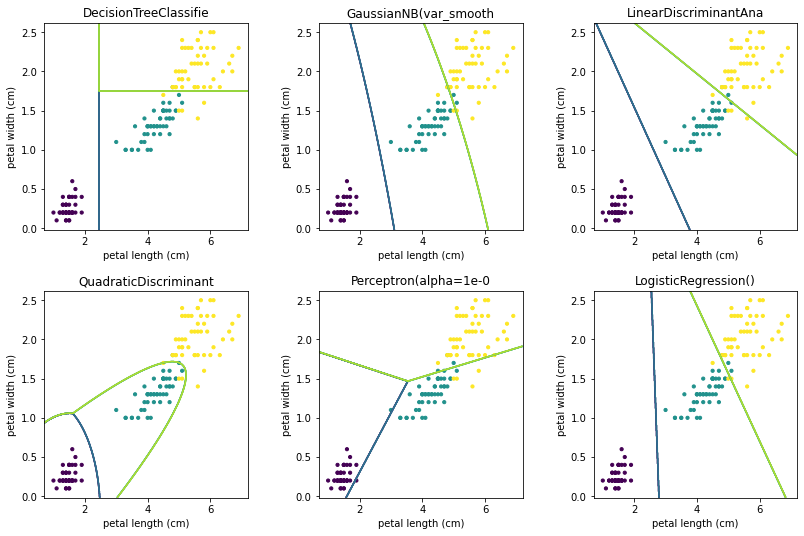

In [12]:
nrows, ncols = 2, 3 # nrows*ncols >= número de clasificadores
fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 4*nrows))
fig.tight_layout(pad=4)
for i, clf in enumerate((dt, gnb, lda, qda, per, lr)):
    ax = axes.flat[i]
    ax.set_title('{0!s:.21s}'.format(clf))
    ax.set_xlabel(fn[0])
    ax.set_ylabel(fn[1])
    ax.scatter(*X.T, c=y, s=10)
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, num=1000), np.linspace(y_min, y_max, num=1000))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z)

**Cuestión:**  ¿Qué tipo de fronteras, lineales o no, induce cada uno de los clasificadores considerados?